Project 3

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
df = pd.read_csv('movie with actors info 2.csv',encoding='ISO-8859-1')
df


,movieid,actorid,movieid.1,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count,date_of_birth,birth_city,birth_country,height_inches,gender,ethnicity,networth
0,273,1323,273,PG-13,120000000,649398328,2002-05-15,Science Fiction,142,6.6,587304.0,1958-02-13,Stockholm,Sweden,68.0,NaN,NaN,NaN
1,329,1648,329,PG-13,113000000,850000000,2005-05-17,Science Fiction,140,7.5,653713.0,1922-05-27,Belgravia,UK,77.0,NaN,NaN,25000000.0
2,14,111,14,PG,35000000,411348924,1989-06-23,Action,126,7.5,319517.0,1937-04-06,New York City,USA,72.0,Male,African American,9000000.0
3,329,1911,329,PG-13,113000000,850000000,2005-05-17,Science Fiction,140,7.5,653713.0,1946-02-21,Salisbury,UK,69.0,Male,NaN,8000000.0
4,14,113,14,PG,35000000,411348924,1989-06-23,Action,126,7.5,319517.0,1920-02-18,Lattimer Mines,USA,75.0,Male,White,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,483,2494,483,PG-13,105000000,716392705,2013-09-27,Science Fiction,91,7.7,724258.0,1968-02-24,NaN,NaN,61.5,Female,White,14000000.0
4316,483,2495,483,PG-13,105000000,716392705,2013-09-27,Science Fiction,91,7.7,724258.0,NaN,NaN,NaN,NaN,Male,NaN,NaN
4317,483,2495,483,PG-13,105000000,716392705,2013-09-27,Science Fiction,91,7.7,724258.0,NaN,NaN,NaN,NaN,Male,NaN,NaN
4318,483,2495,483,PG-13,105000000,716392705,2013-09-27,Science Fiction,91,7.7,724258.0,NaN,NaN,NaN,NaN,Male,NaN,NaN


                        movieid   actorid    budget     gross  release_date  \
movieid                1.000000  0.792235  0.611695  0.509758      0.997877   
actorid                0.792235  1.000000  0.433316  0.375844      0.792969   
budget                 0.611695  0.433316  1.000000  0.653546      0.585402   
gross                  0.509758  0.375844  0.653546  1.000000      0.496861   
release_date           0.997877  0.792969  0.585402  0.496861      1.000000   
runtime                0.041565  0.030628  0.261165  0.297957      0.035496   
rating                -0.023698 -0.029819  0.033315  0.258967     -0.018629   
rating_count           0.293990  0.227865  0.316043  0.540648      0.289503   
height_inches         -0.028071 -0.065753  0.003952 -0.019870     -0.030735   
networth              -0.007250 -0.026913 -0.002228  0.024780     -0.006670   
age_at_release         0.042458 -0.145528  0.093533  0.041871      0.039607   
mpaa_rating_PG        -0.029880 -0.037982 -0.012776 

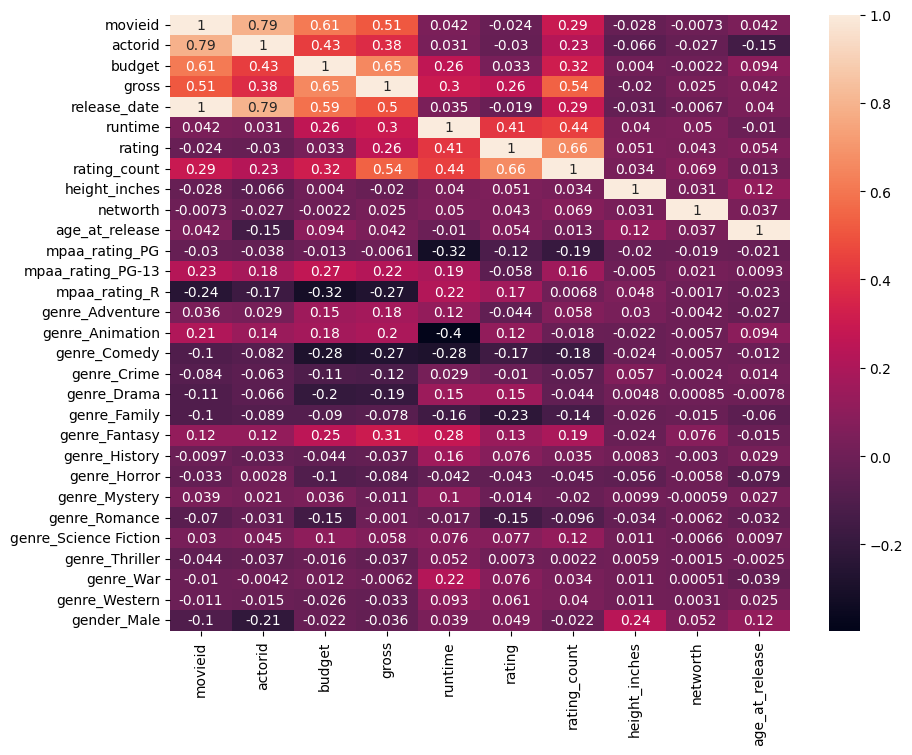

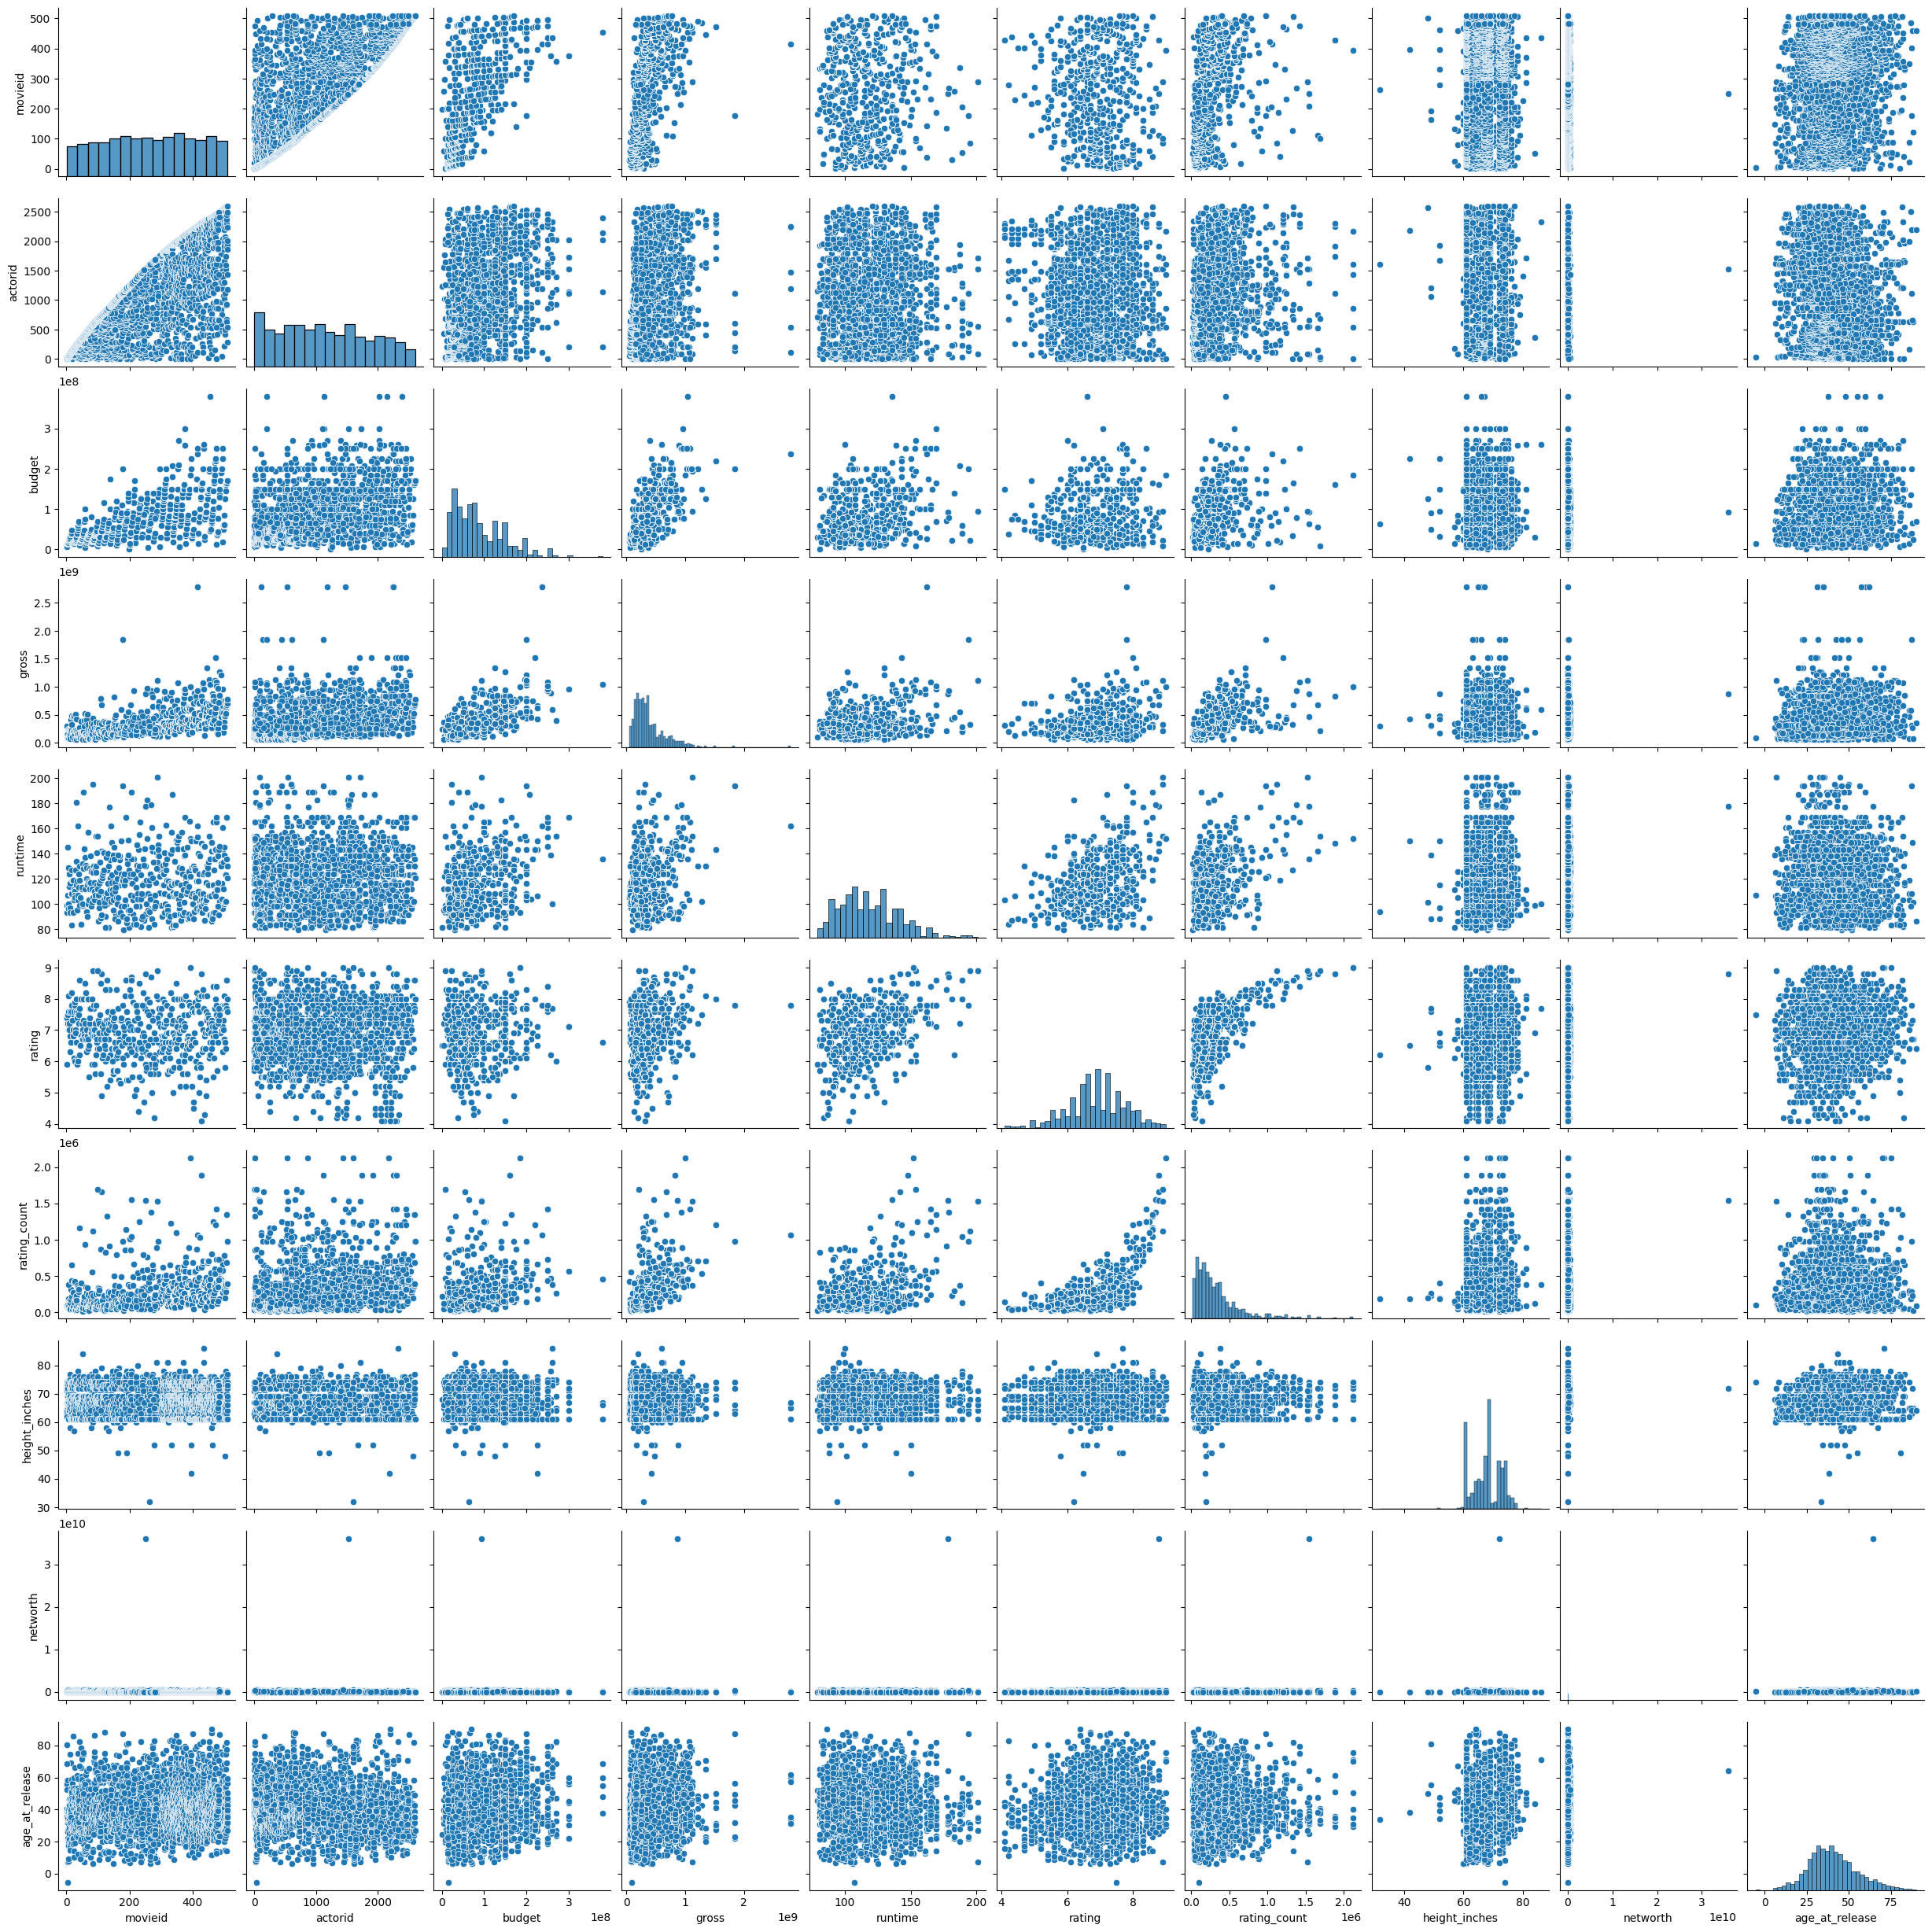

In [199]:


df.drop('birth_country',axis=1,inplace=True)

df.drop(columns=['ethnicity','movieid.1','birth_city'],axis=1,inplace=True)


df['date_of_birth'] = df['date_of_birth'].replace(to_replace=r'\d{4}-0-0', value=np.nan, regex=True)

df['release_date'] = pd.to_datetime(df['release_date'],errors='coerce')
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],errors='coerce')


df['age_at_release']=(df['release_date']-df['date_of_birth'])
df['age_at_release']=df['age_at_release'].dt.days
df['age_at_release']=df['age_at_release']/365.25
df.drop('date_of_birth',axis=1,inplace=True)

df=pd.get_dummies(df,drop_first=True)
df





correlation_matrix = df.corr()

#Display the correlation matrix
print(correlation_matrix)
columns=['movieid','actorid','budget','gross','runtime','rating','rating_count','height_inches','networth','age_at_release']
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[columns],annot=True)


sns.pairplot(df[columns].dropna(how='any'))  

In [200]:
df

,movieid,actorid,budget,gross,release_date,runtime,rating,rating_count,height_inches,networth,...,genre_Fantasy,genre_History,genre_Horror,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western,gender_Male
0,273,1323,120000000,649398328,2002-05-15,142,6.6,587304.0,68.0,NaN,...,False,False,False,False,False,True,False,False,False,False
1,329,1648,113000000,850000000,2005-05-17,140,7.5,653713.0,77.0,25000000.0,...,False,False,False,False,False,True,False,False,False,False
2,14,111,35000000,411348924,1989-06-23,126,7.5,319517.0,72.0,9000000.0,...,False,False,False,False,False,False,False,False,False,True
3,329,1911,113000000,850000000,2005-05-17,140,7.5,653713.0,69.0,8000000.0,...,False,False,False,False,False,True,False,False,False,True
4,14,113,35000000,411348924,1989-06-23,126,7.5,319517.0,75.0,10000000.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,483,2494,105000000,716392705,2013-09-27,91,7.7,724258.0,61.5,14000000.0,...,False,False,False,False,False,True,False,False,False,False
4316,483,2495,105000000,716392705,2013-09-27,91,7.7,724258.0,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
4317,483,2495,105000000,716392705,2013-09-27,91,7.7,724258.0,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True
4318,483,2495,105000000,716392705,2013-09-27,91,7.7,724258.0,NaN,NaN,...,False,False,False,False,False,True,False,False,False,True


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('rating', axis=1)  # Features (excluding target variable)
y = df['rating'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the rainfall
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




